In [3]:
## Data Collection: Load csv files and check contents

import pandas as pd
import glob

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)        # Set display width to avoid line breaks


# Define the path to your CSV files
csv_files = glob.glob('fuel_prices_*.csv')  # Assumes all files start with 'fuel_price_' and are in the current directory

# Load all CSV files into a list of DataFrames
df_list = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into one DataFrame
df = pd.concat(df_list, ignore_index=True)

# Display the shape of the combined DataFrame to verify
print(df.shape)
df.head(20)

(469336, 12)


,SiteId,Site_Name,Site_Brand,Sites_Address_Line_1,Site_Suburb,Site_State,Site_Post_Code,Site_Latitude,Site_Longitude,Fuel_Type,Price,TransactionDateutc
0,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,1879,31/03/2024 18:20
1,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,e10,2339,16/04/2024 04:46
2,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,LPG,1119,31/03/2024 18:20
3,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Premium Diesel,1999,31/03/2024 18:20
4,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2109,31/03/2024 18:20
5,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,PULP 98 RON,2569,16/04/2024 04:46
6,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,1899,31/03/2024 18:20
7,61401007,7-Eleven Coomera,7 Eleven,Pacific Highway,Coomera,QLD,4209,-27.868591,153.314206,Unleaded,2359,16/04/2024 04:46
8,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1849,31/03/2024 14:00
9,61401008,EG Ampol Oxenford,EG Ampol,116 Old Pacific Highway,Oxenford,QLD,4210,-27.891217,153.313369,e10,1859,09/04/2024 01:15


In [8]:
# Extract distinct Site Information
site_info_columns = ['SiteId', 'Site_Name', 'Site_Brand', 'Sites_Address_Line_1', 'Site_Suburb', 'Site_Post_Code', 'Site_Latitude', 'Site_Longitude']

site_info = df[site_info_columns].drop_duplicates()

# Display the tables
print("Site Information:")
print(site_info)

# Check if SiteId is unique in the Site Information table
is_unique = site_info['SiteId'].is_unique

if is_unique:
    print("All SiteIds are unique in the Site Information table.")
else:
    print("There are duplicate SiteIds in the Site Information table.")
    # Display duplicate SiteIds
    duplicates = site_info[site_info.duplicated(['SiteId'], keep=False)]
    print("Duplicate SiteIds:")
    print(duplicates)

# Get the list of duplicate SiteIds
duplicate_site_ids = duplicates['SiteId'].unique()

# Filter the site_info DataFrame for these duplicate SiteIds
duplicate_rows = site_info[site_info['SiteId'].isin(duplicate_site_ids)]

# Print the rows with duplicate SiteIds
print(duplicate_rows)

Site Information:
          SiteId                      Site_Name     Site_Brand             Sites_Address_Line_1        Site_Suburb  Site_Post_Code  Site_Latitude  Site_Longitude
0       61401007               7-Eleven Coomera       7 Eleven                  Pacific Highway            Coomera            4209     -27.868591      153.314206
8       61401008              EG Ampol Oxenford       EG Ampol          116 Old Pacific Highway           Oxenford            4210     -27.891217      153.313369
33      61401010           Coles Express Nerang  Coles Express                 6-8 Ferry Street             Nerang            4211     -27.990022      153.337183
54      61401011     Ampol Foodary Nerang South          Ampol  Cnr Pappas Wy West & Hinkler Dr       South Nerang            4211     -28.007074      153.341476
92      61401013       Caltex Broadbeach Waters         Caltex              75 T E Peters Drive  Broadbeach Waters            4218     -28.026556      153.420502
...       

In [11]:
# Group by SiteId and count the number of occurrences of each SiteId
siteid_counts = site_info['SiteId'].value_counts()

# Filter for SiteIds that have more than one occurrence (duplicates)
duplicated_distribution = siteid_counts[siteid_counts > 1]

# Display the distribution of duplicate counts
print(duplicated_distribution)

SiteId
61477102    5
61478051    3
61478098    3
61402241    3
61477117    3
           ..
61401656    2
61477774    2
61402006    2
61401946    2
61477808    2
Name: count, Length: 109, dtype: int64


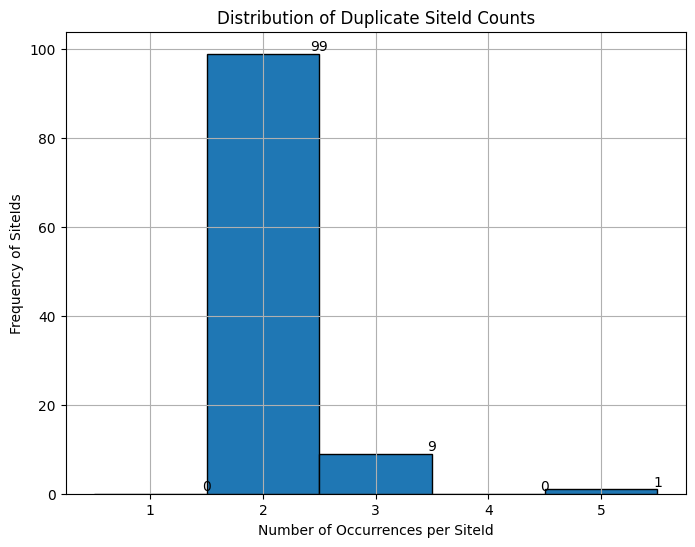

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

site_info = duplicate_rows

# Count the occurrences of each SiteId
siteid_counts = site_info['SiteId'].value_counts()

# Create the histogram
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(siteid_counts, bins=range(1, siteid_counts.max() + 2), edgecolor='black', align='left')

# Annotate the frequency on top of each bar
for i in range(len(n)):
    plt.text(bins[i] + 0.5, n[i], str(int(n[i])), ha='center', va='bottom')

# Add titles and labels
plt.title('Distribution of Duplicate SiteId Counts')
plt.xlabel('Number of Occurrences per SiteId')
plt.ylabel('Frequency of SiteIds')
plt.xticks(range(1, siteid_counts.max() + 1))
plt.grid(True)

# Show the plot
plt.show()

In [ ]:


# Extract Price Information with relevant columns
price_info_columns = ['SiteId', 'Fuel_Type', 'Price', 'TransactionDateutc']
price_info = df[price_info_columns].copy()

# Extract Fuel Types
fuel_types = df[['Fuel_Type']].drop_duplicates()

# Extract Brand List
brand_list = df[['Site_Brand']].drop_duplicates()

print("\nPrice Information:")
print(price_info)

print("\nFuel Types:")
print(fuel_types)

print("\nBrand List:")
print(brand_list)

In [7]:
import pandas as pd

# Sort by 'SiteId' and 'TransactionDateutc' to keep the latest entry
df_sorted_latest = df.sort_values(by=['SiteId', 'TransactionDateutc'], ascending=[True, False])

# Drop duplicates, keeping the latest record for each 'SiteId'
fuel_station = df_sorted_latest[['SiteId', 'Site_Name', 'Site_Brand', 'Sites_Address_Line_1', 
                                 'Site_Suburb', 'Site_State', 'Site_Post_Code', 
                                 'Site_Latitude', 'Site_Longitude']].drop_duplicates(subset='SiteId', keep='first')

# Extract fuel_prices table
fuel_prices = df[['SiteId', 'Fuel_Type', 'Price', 'TransactionDateutc']]

# Extract fuel_types table (removing duplicate fuel types)
fuel_types = df[['Fuel_Type']].drop_duplicates()

# Display the extracted tables (just for confirmation)
print("Fuel Station Table")
print(fuel_station.shape)
print(fuel_station.head())

print("\nFuel Prices Table")
print(fuel_prices.shape)
print(fuel_prices.head())

print("\nFuel Types Table")
print(fuel_types.shape)
print(fuel_types.head())

Fuel Station Table
(1677, 9)
          SiteId             Site_Name     Site_Brand     Sites_Address_Line_1 Site_Suburb Site_State  Site_Post_Code  Site_Latitude  Site_Longitude
91102   61290151         Liberty Surat        Liberty       61 Burrowes Street       Surat        QLD            4417     -27.151687      149.067742
429509  61291313    Lowes Mungindi Opt             BP        126 Barwon Street    Mungindi        QLD            4497     -28.973467      148.983829
361661  61401007      7-Eleven Coomera       7 Eleven          Pacific Highway     Coomera        QLD            4209     -27.868591      153.314206
361734  61401008     EG Ampol Oxenford       EG Ampol  116 Old Pacific Highway    Oxenford        QLD            4210     -27.891217      153.313369
361868  61401010  Coles Express Nerang  Coles Express         6-8 Ferry Street      Nerang        QLD            4211     -27.990022      153.337183

Fuel Prices Table
(469336, 4)
     SiteId       Fuel_Type  Price Transaction